In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
iris = load_iris()

iris_data = pd.DataFrame(
    data=iris.data,
    columns=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
)

iris_data["FlowerType"] = iris.target
iris_data.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,FlowerType
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
print("Total rows and columns:", iris_data.shape)

print("\nUnique flower classes:")
print(iris_data["FlowerType"].value_counts())

print("\nChecking for null values:")
print(iris_data.isnull().sum())


Total rows and columns: (150, 5)

Unique flower classes:
FlowerType
0    50
1    50
2    50
Name: count, dtype: int64

Checking for null values:
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
FlowerType     0
dtype: int64


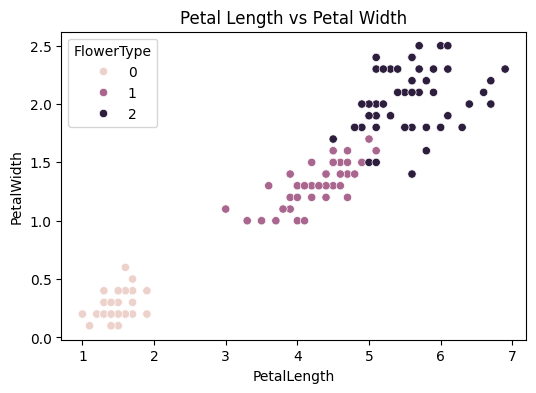

In [4]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="PetalLength",
    y="PetalWidth",
    hue="FlowerType",
    data=iris_data
)
plt.title("Petal Length vs Petal Width")
plt.show()


In [5]:
features = iris_data.iloc[:, 0:4]
labels = iris_data["FlowerType"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.25,
    random_state=10
)


In [7]:

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [8]:
test_predictions = knn_model.predict(X_test)


In [9]:
accuracy = accuracy_score(y_test, test_predictions)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9736842105263158


In [10]:
print("Classification Report:\n")
print(classification_report(y_test, test_predictions))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [11]:
sample_flower = [[5.1, 3.5, 1.4, 0.2]]
prediction = knn_model.predict(sample_flower)

print("Predicted Flower Class:", prediction)


Predicted Flower Class: [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In this project, I built a machine learning model to classify Iris flowers into three species using flower measurements.
Logistic Regression was used because it is simple and effective for multi-class classification problems.
The model achieved high accuracy, showing that the dataset is well-structured and suitable for classification tasks.